In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import optimize
from scipy import stats
plt.style.use(r"/home/vladimir/BOTAY!/Labs/jupyter_template/style.mplstyle")
from scipy.optimize import curve_fit

### Эксперимент 1

In [4]:
C = 75

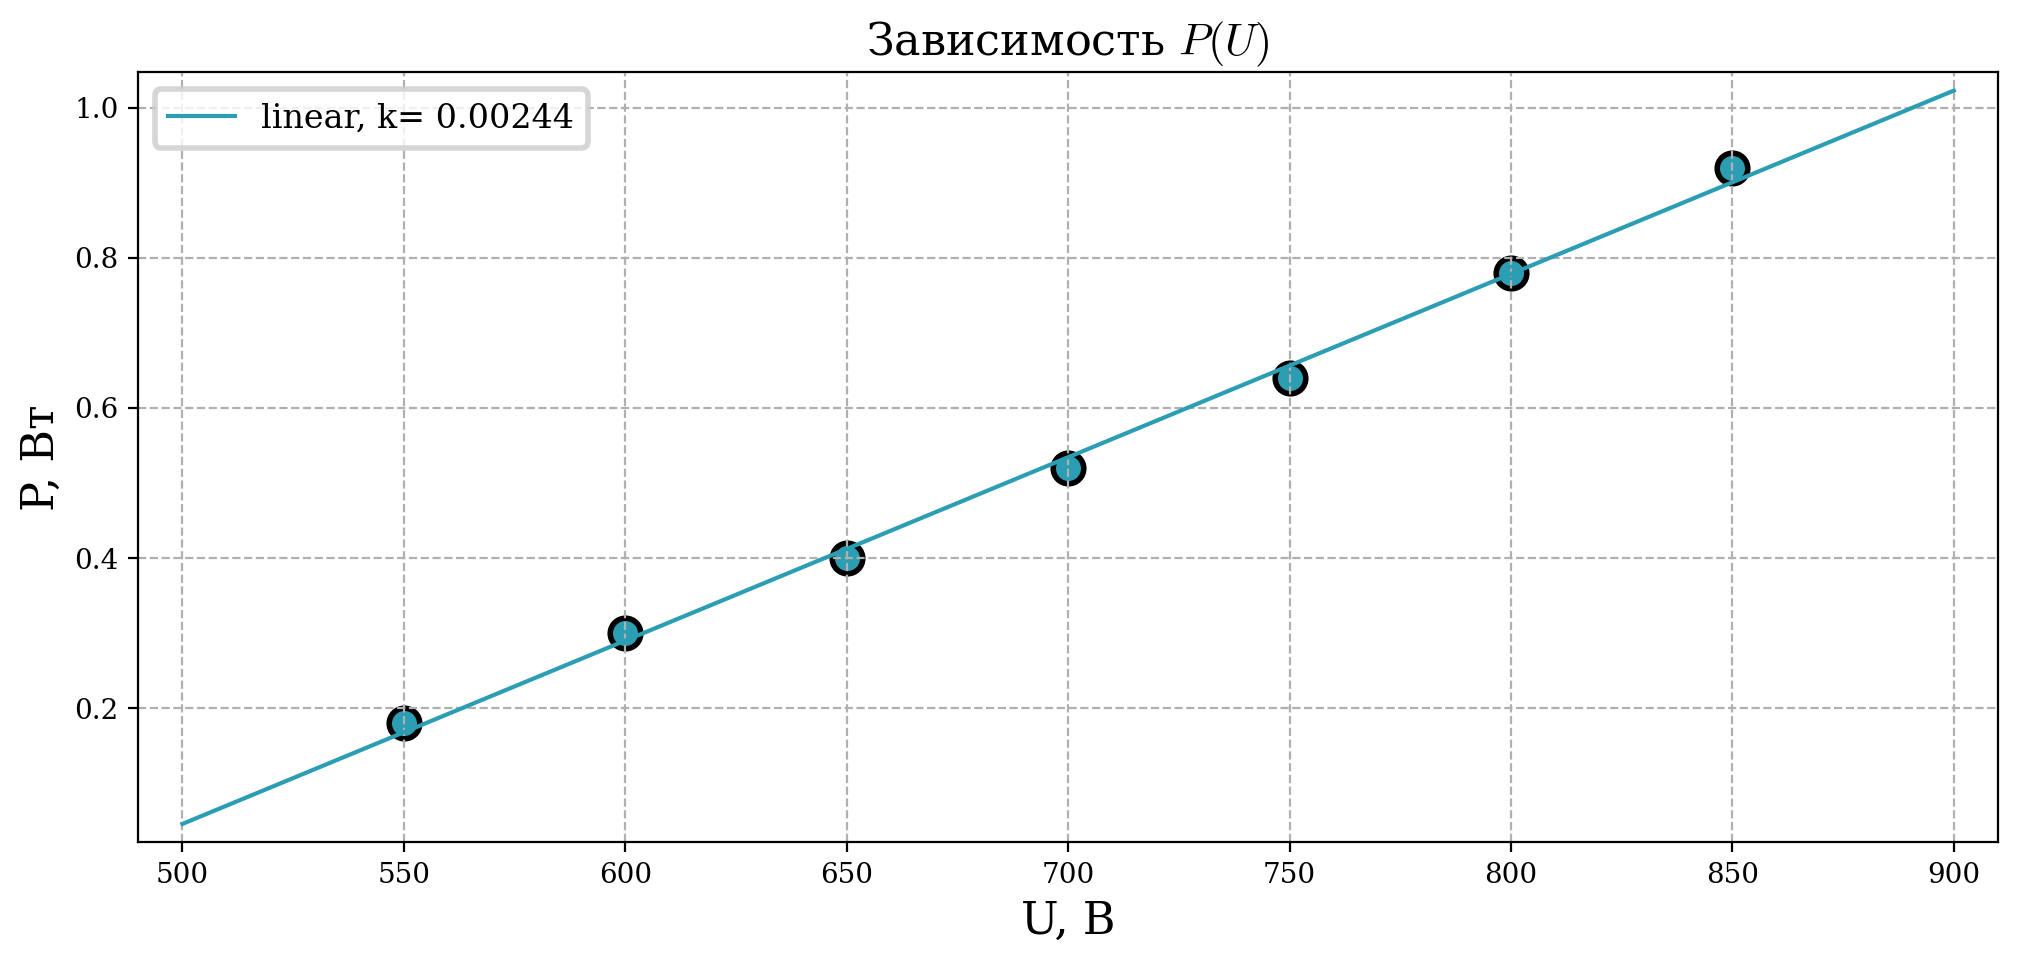

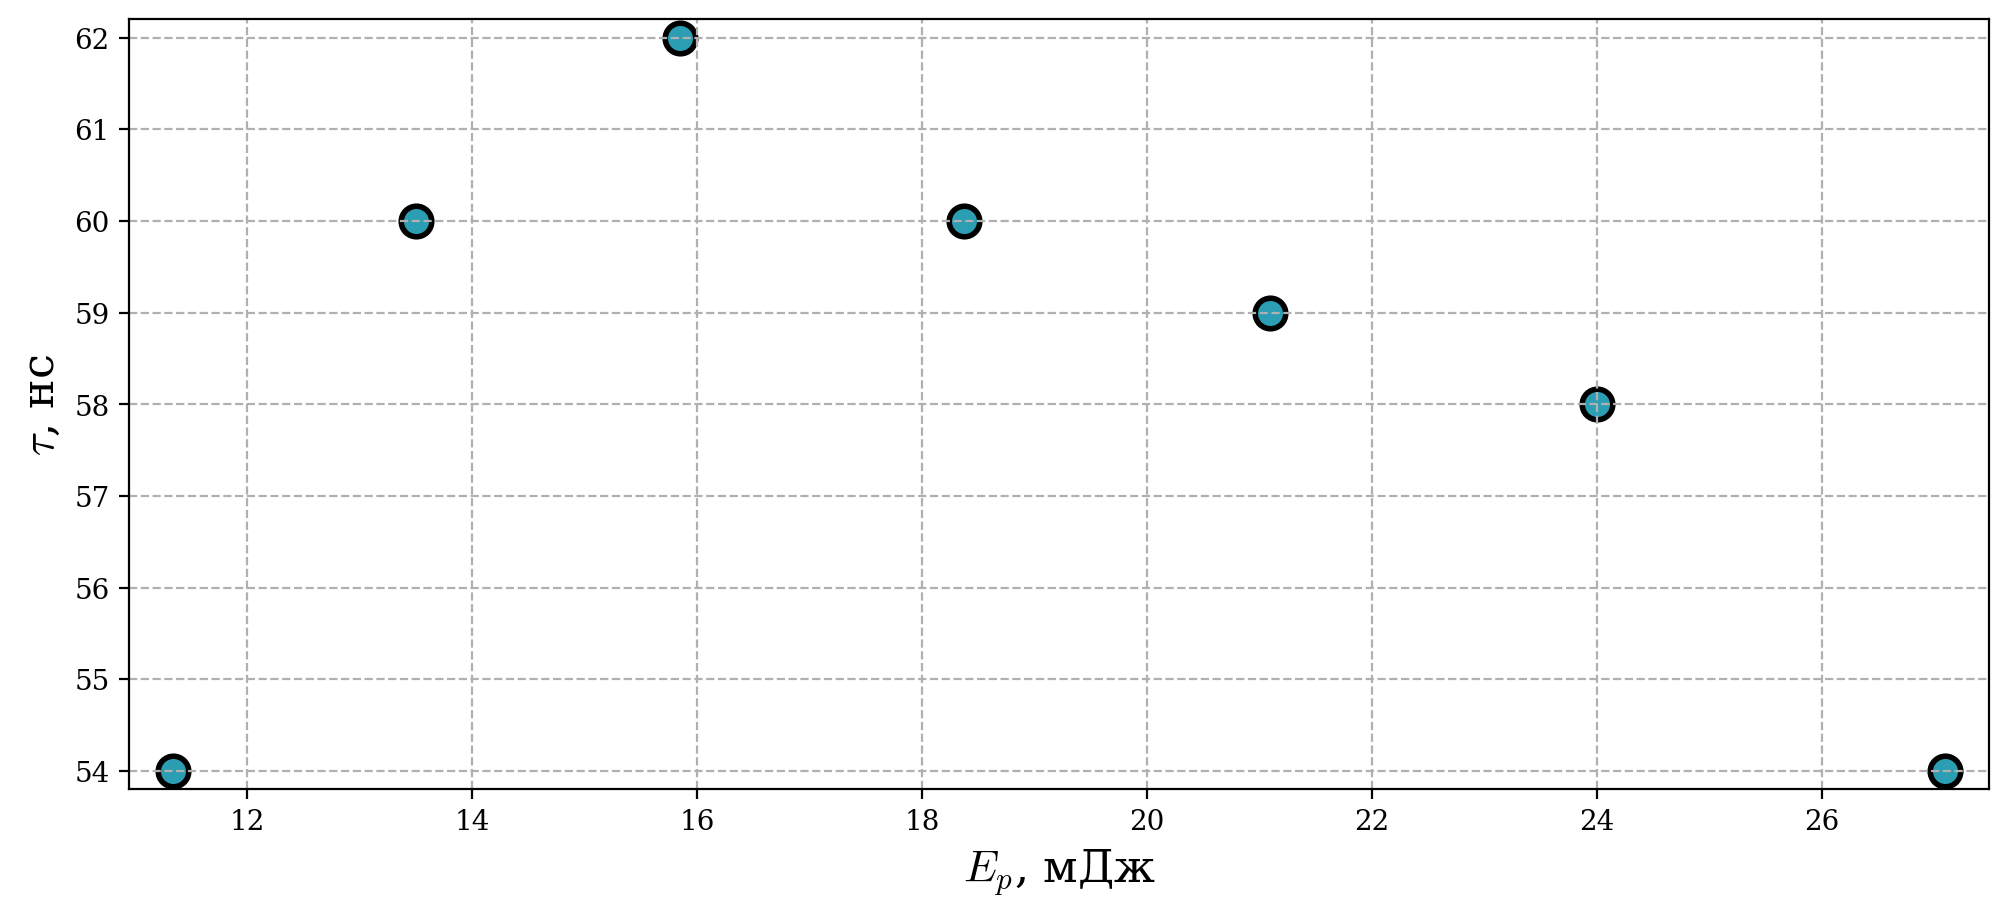

In [5]:
# data 1
U_cond = [850, 800, 750, 700, 650, 600, 550] # V
P_impulse = [0.92, 0.78, 0.64, 0.52, 0.40, 0.30, 0.18] # Watt
width_impulse = [54, 58, 59, 60, 62, 60, 54] # mks




E_p = (C *1e-6 * np.array(U_cond)**2) / 2
E = np.array(P_impulse) * np.array(width_impulse)

delta_E = 0.01*np.array(width_impulse) + np.array(P_impulse) * 1

def linear(x, a, b):
    return a*(x - b)

plt.title('Зависимость $P(U)$')
plt.grid(True)
plt.xlabel('U, В')
plt.ylabel('P, Вт')
popt, pcov = curve_fit(linear, U_cond, P_impulse)
plt.scatter(U_cond, P_impulse)


x1 = 500
x2 = 900

plt.plot([x1, x2], [popt[0]*(x1-popt[1]), popt[0]*(x2-popt[1])], label='linear, k= {:.3}'.format(popt[0]))
plt.legend()

plt.show()


plt.grid(True)
plt.xlabel('$E_p$, мДж')
plt.ylabel(r'$\tau$, нс')
plt.scatter(E_p, width_impulse)

plt.show()

__Зависимость в энергетических величинах__


In [6]:
U_cond = np.array([850, 800, 750, 700, 650, 600, 550])
P_impulse = np.array([0.92, 0.78, 0.64, 0.52, 0.40, 0.30, 0.18])

КПД: 0.00372 +/- 0.00004


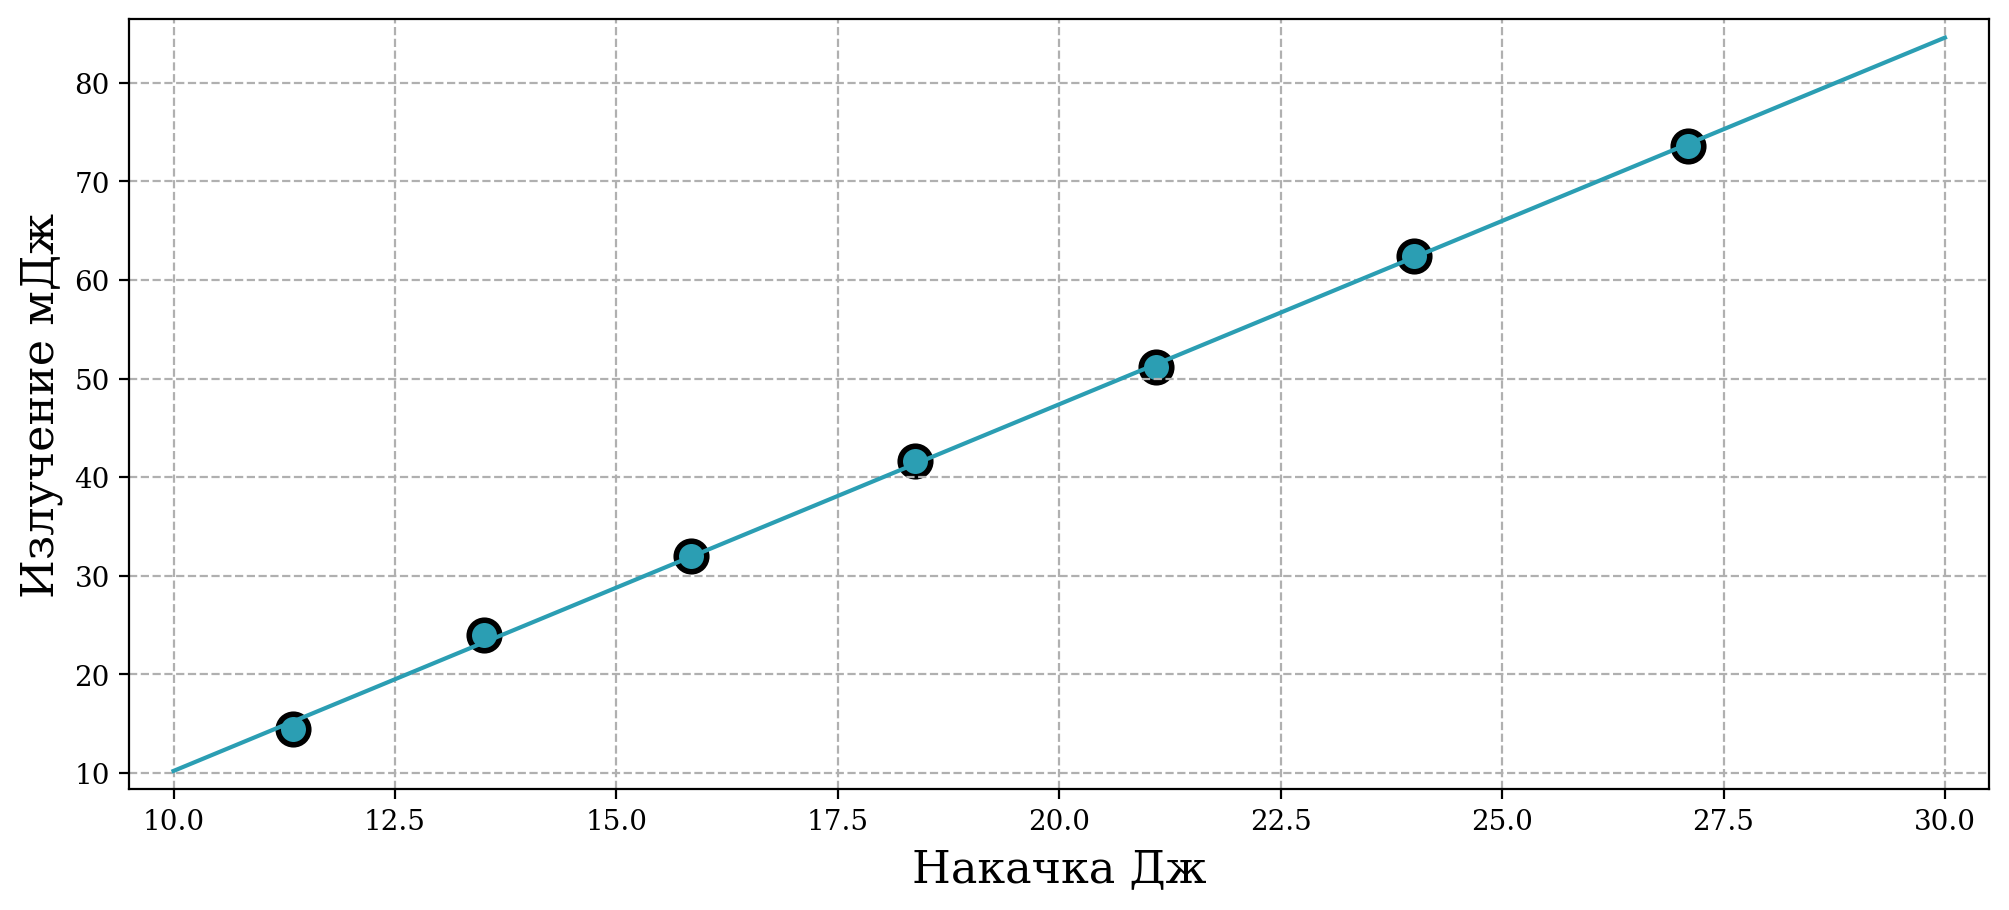

In [7]:
E_pump = 1e-6 * np.power(U_cond, 2) * C / 2
Ee = P_impulse * 1e3 / (12.5)

MNK = stats.linregress(E_pump, Ee)
x_line = np.linspace(10, 30, 1000)
y_line = MNK.slope * x_line + MNK.intercept
print(f"КПД: {MNK.slope * 1e-3:.5f} +/- {np.abs(MNK.stderr) * 1e-3:.5f}")

plt.scatter(E_pump, Ee)
plt.ylabel("Излучение мДж")
plt.xlabel("Накачка Дж")
plt.plot(x_line, y_line)

КПД: 0.00007 +/- 0.00000


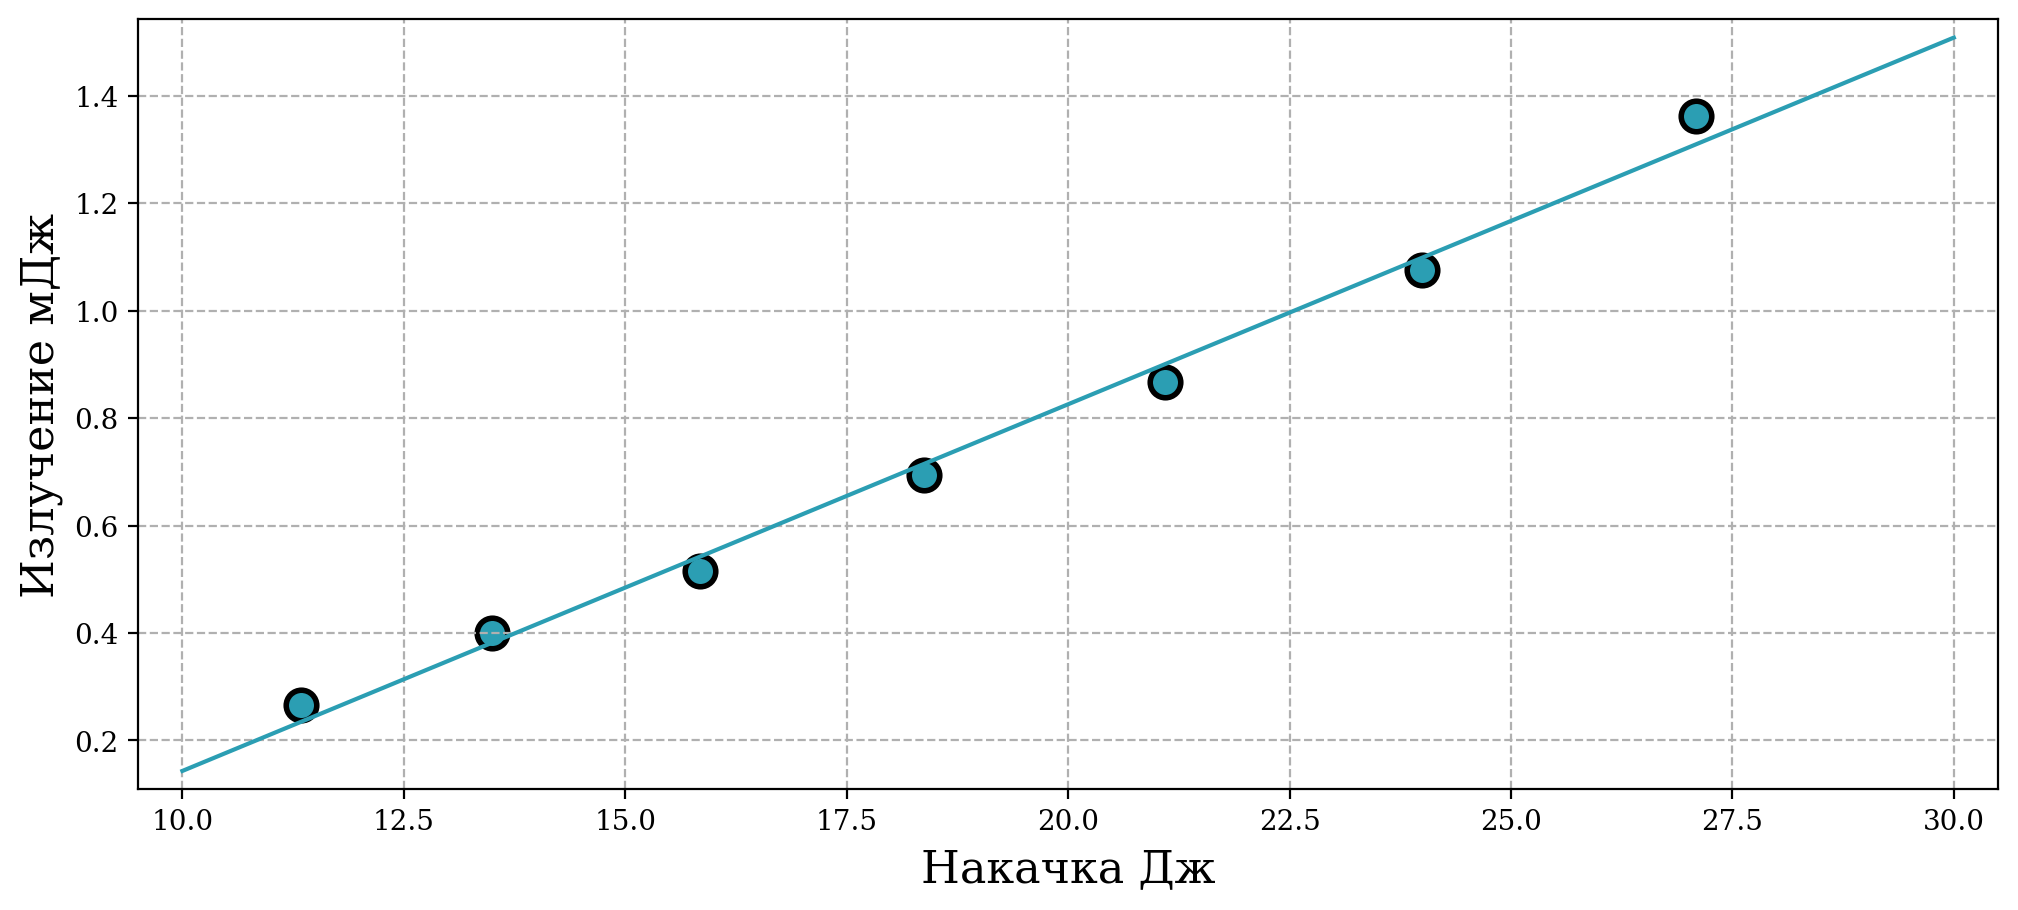

In [8]:
E_pump = 1e-6 * np.power(U_cond, 2) * C / 2
Ee = P_impulse * 1e3 / (12.5)
Ee /= np.array(width_impulse)
MNK = stats.linregress(E_pump, Ee)
x_line = np.linspace(10, 30, 1000)
y_line = MNK.slope * x_line + MNK.intercept
print(f"КПД: {MNK.slope * 1e-3:.5f} +/- {np.abs(MNK.stderr) * 1e-3:.5f}")

plt.scatter(E_pump, Ee)
plt.ylabel("Излучение мДж")
plt.xlabel("Накачка Дж")
plt.plot(x_line, y_line)

### Эксперимент 2

In [9]:
data = pd.read_csv("2.csv")
data

,V,P,d[ns]
0,660,0.08,20
1,700,0.13,44
2,725,0.14,51
3,750,0.15,51
4,775,0.25,47
5,800,0.32,47
6,825,0.36,47
7,850,0.36,43
8,875,0.38,43
9,900,0.50,35


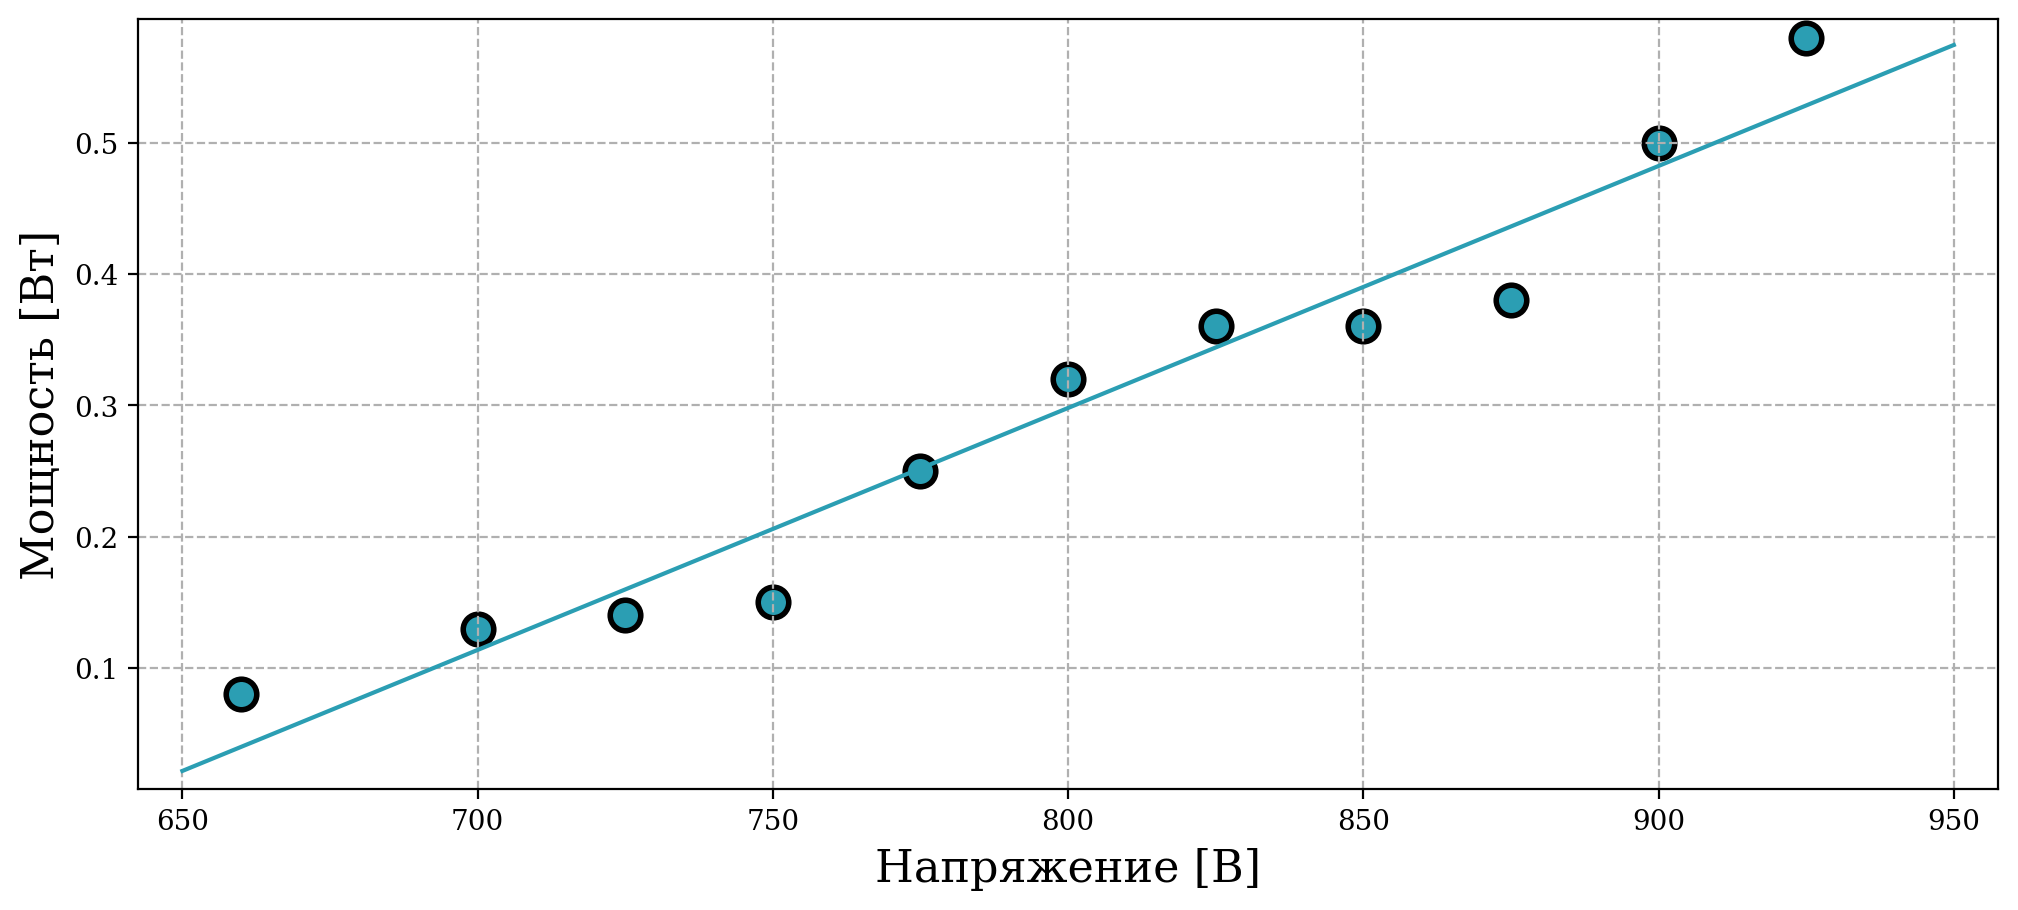

In [10]:
MNK = stats.linregress(data['V'], data['P'])
x_line = np.linspace(650, 950, 1000)
y_line = MNK.slope * x_line + MNK.intercept
plt.scatter(data['V'], data['P'])
plt.xlabel("Напряжение [В]")
plt.ylabel("Мощность [Вт]")
plt.plot(x_line, y_line)

Text(0, 0.5, 'Длительность [нс]')

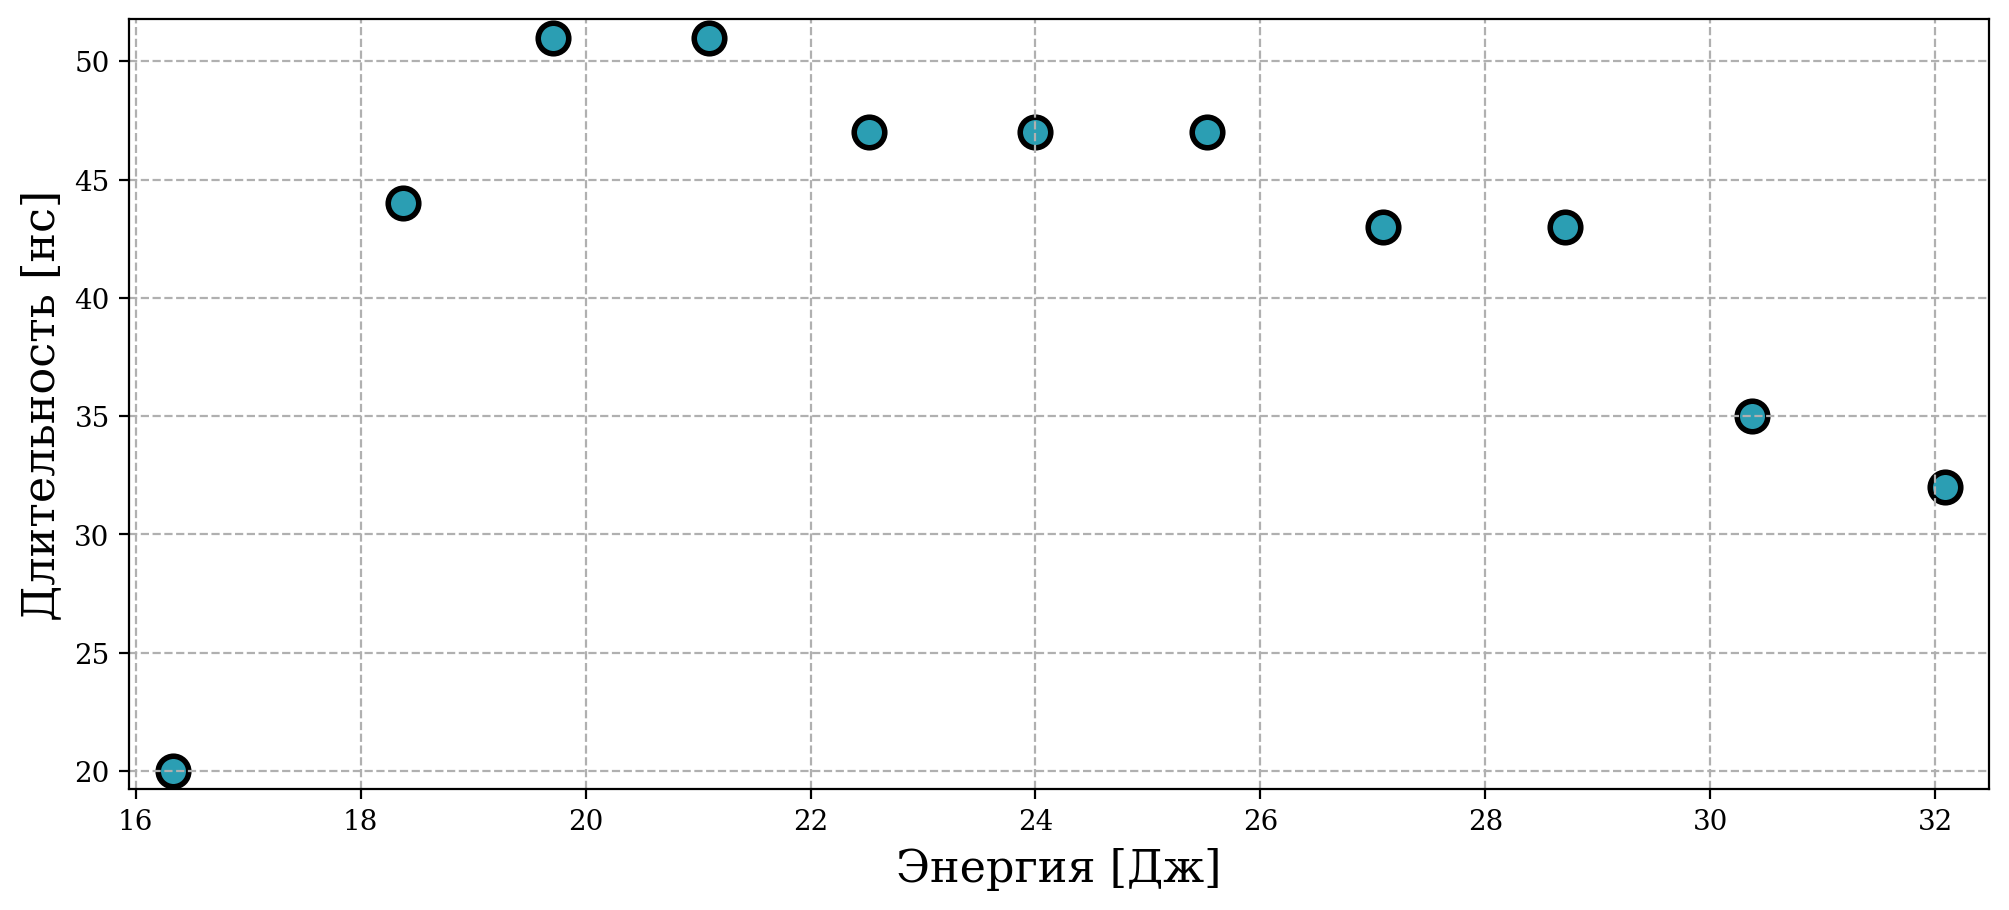

In [11]:
plt.scatter(C * 1e-6 * np.power(data['V'], 2) / 2, data['d[ns]'])
plt.xlabel("Энергия [Дж]")
plt.ylabel("Длительность [нс]")

In [12]:
21 / 12.5

1.68

__Рассчет КПД__

КПД: 0.00248 +/- 0.00017


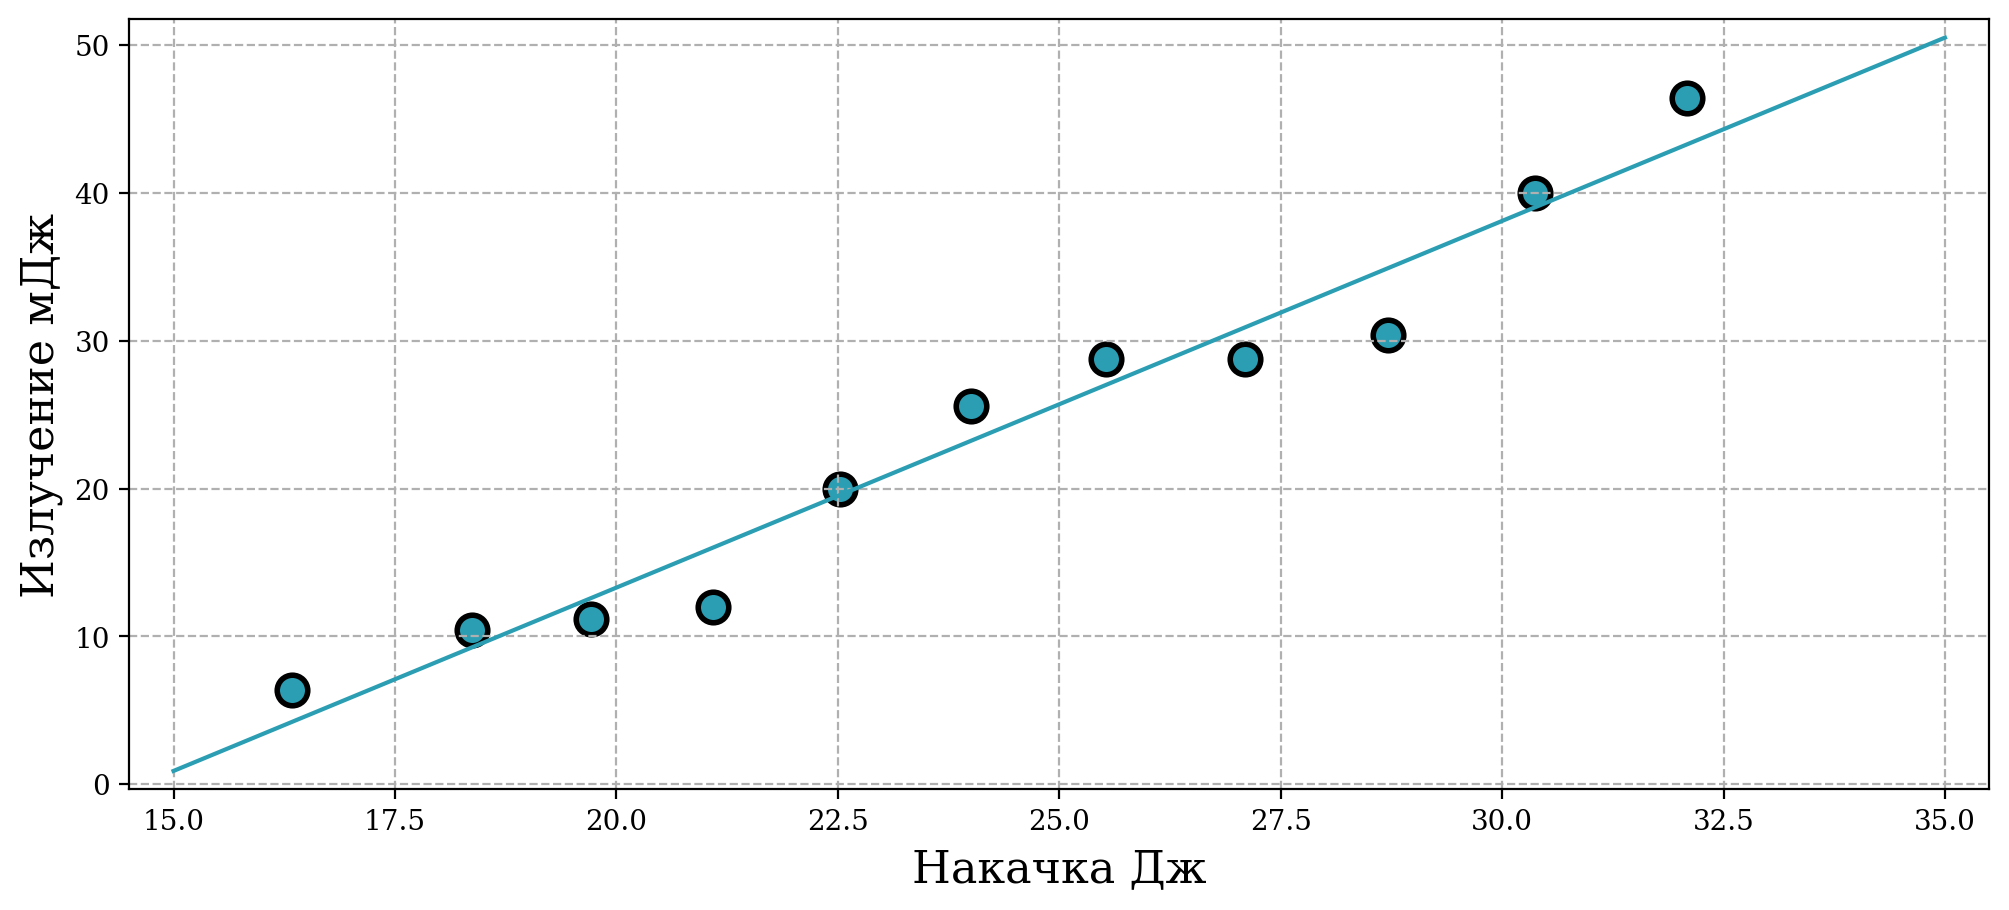

In [13]:
E_pump = 1e-6 * np.power(data['V'], 2) * C / 2
Ee = data['P'] * 1e3 / (12.5)
MNK = stats.linregress(E_pump, Ee)
x_line = np.linspace(15, 35, 1000)
y_line = MNK.slope * x_line + MNK.intercept
print(f"КПД: {MNK.slope * 1e-3:.5f} +/- {np.abs(MNK.stderr) * 1e-3:.5f}")

plt.scatter(E_pump, Ee)
plt.ylabel("Излучение мДж")
plt.xlabel("Накачка Дж")
plt.plot(x_line, y_line)

КПД: 70.28677 +/- 10.85272


Text(0.5, 0, 'Накачка Дж')

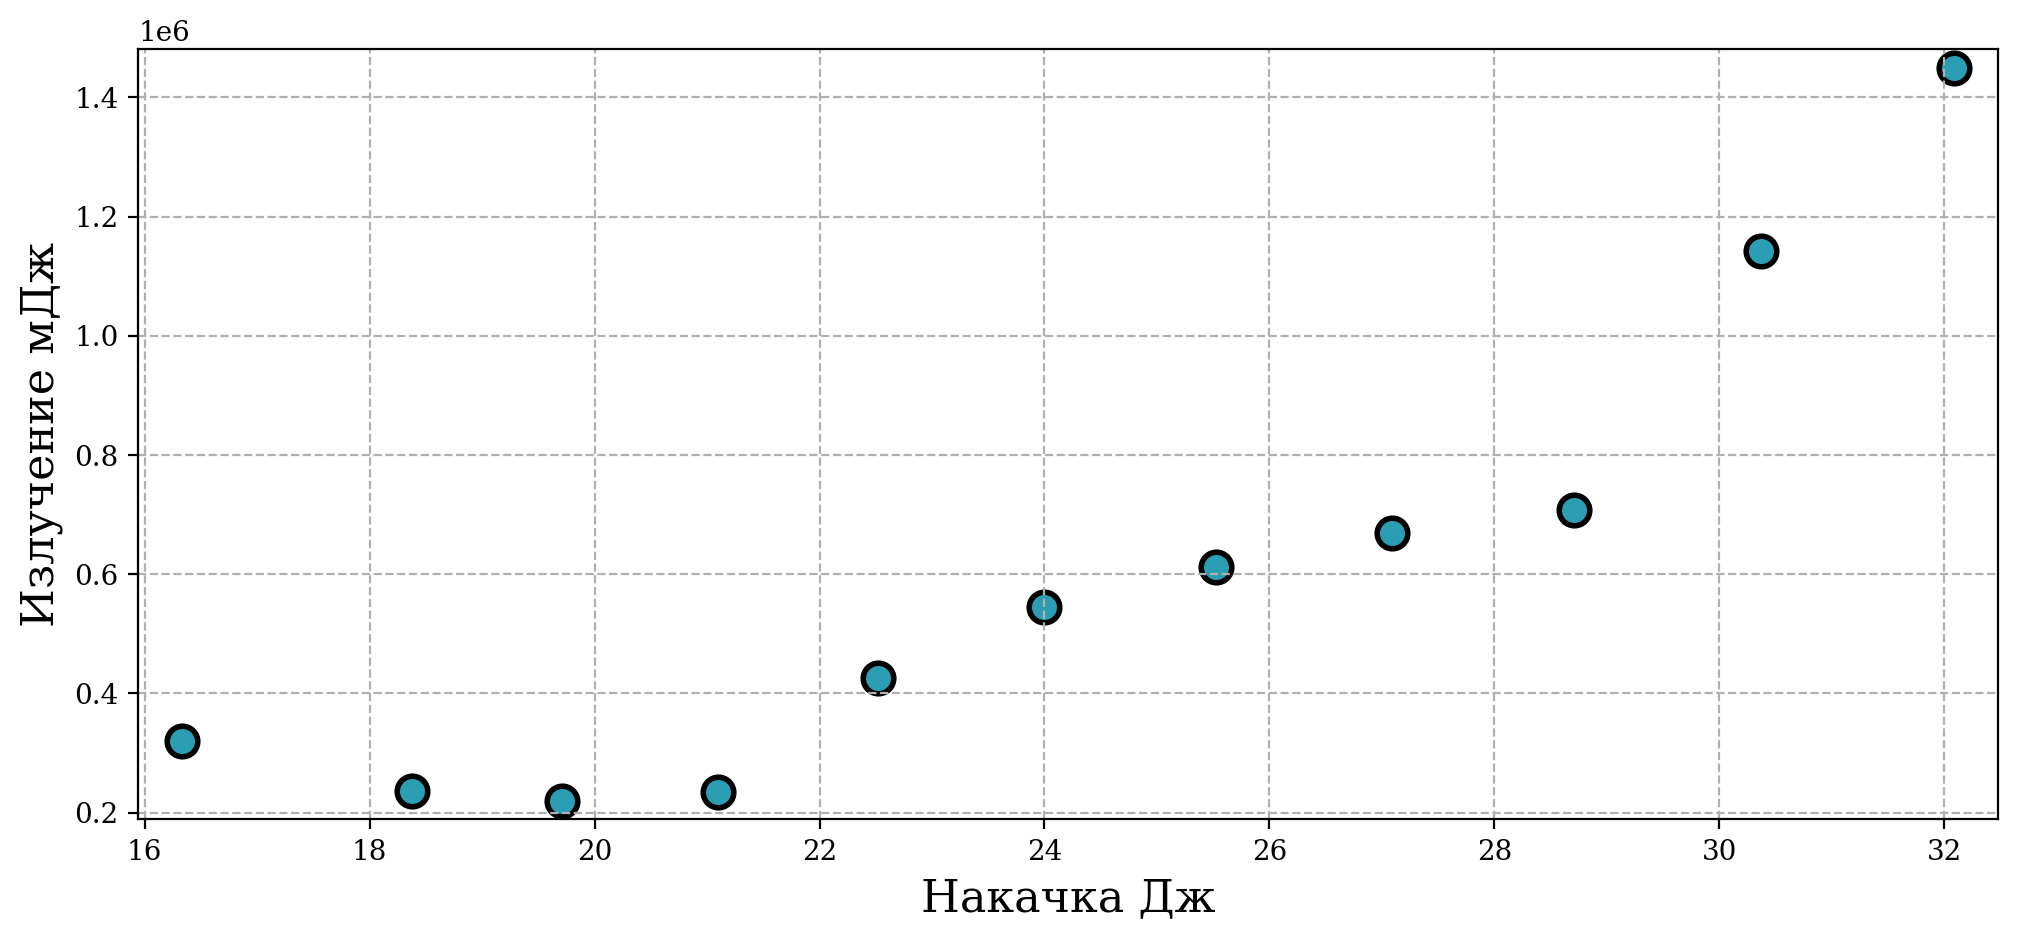

In [14]:
E_pump = 1e-6 * np.power(data['V'], 2) * C / 2
Ee = data['P'] * 1e3 / (12.5)
Ee /= data['d[ns]']
Ee *= 1e6
MNK = stats.linregress(E_pump, Ee)
x_line = np.linspace(15, 35, 1000)
y_line = MNK.slope * x_line + MNK.intercept
print(f"КПД: {MNK.slope * 1e-3:.5f} +/- {np.abs(MNK.stderr) * 1e-3:.5f}")

plt.scatter(E_pump, Ee)
plt.ylabel("Излучение мДж")
plt.xlabel("Накачка Дж")
# plt.plot(x_line, y_line)